In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import library3 as lb

Ques 1:

In [2]:
#Generating the random number according to the question

rand1 = lb.rng(seed=11,a=65,m=1021,c=0)
rand2 = lb.rng(seed=11,a=572,m=16381,c=0)

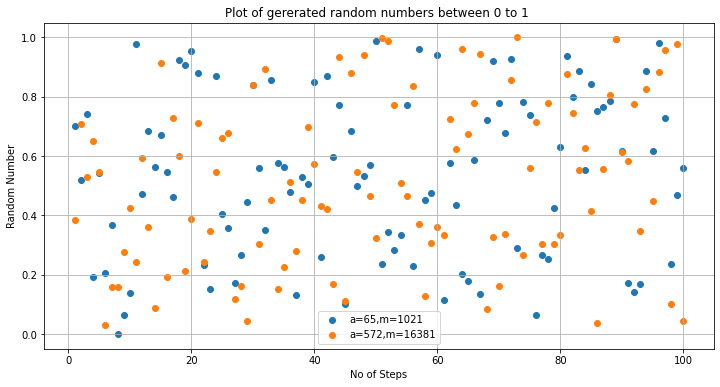

In [3]:
xlist = [i for i in range(1,101)]
ylist_1 = [rand1.gen() for i in range(1,101)]
ylist_2 = [rand2.gen() for i in range(1,101)]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(xlist,ylist_1,label='a=65,m=1021')
plt.scatter(xlist,ylist_2,label='a=572,m=16381')
plt.xlabel('No of Steps')
plt.ylabel('Random Number')
plt.title('Plot of gererated random numbers between 0 to 1 ')
plt.legend()
plt.grid()
plt.show()

Ques 2:

In [4]:
def f(x):
    return np.cos(x)


x_min = -np.pi/2
x_max = np.pi/2

#using the random no. generator in problem 1

I = lb.monte_integrate(f,x_min,x_max,10000,17,multiplier=572,m=16381,c=0)
print("The value of integral is ",I, "using 10000 points") 

The value of integral is  2.0065394710490914 using 10000 points


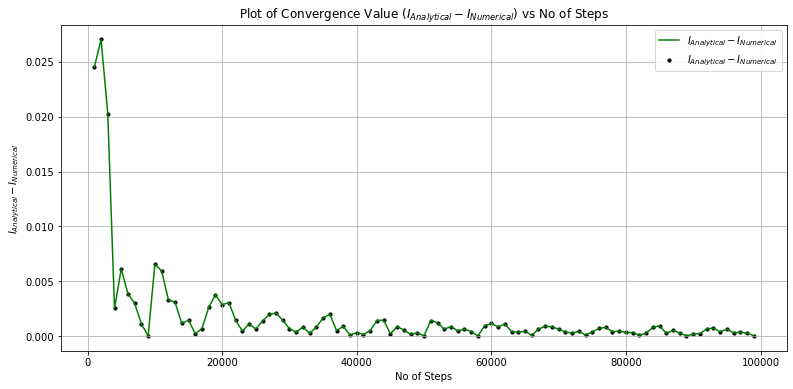

In [5]:
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
for i in range(1000,100000,1000):
    xlist.append(i)
    ylist.append(abs(2-lb.monte_integrate(f,x_min,x_max,i,17,multiplier=572,m=16381,c=0)))

plt.plot(xlist,ylist,label=r'$I_{Analytical} - I_{Numerical}$',color='green')
plt.scatter(xlist,ylist,label=r'$I_{Analytical} - I_{Numerical}$',color='black',s=10)
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Analytical} - I_{Numerical}$')
plt.title(r'Plot of Convergence Value ($I_{Analytical} - I_{Numerical}$) vs No of Steps')
plt.legend()
plt.grid()
plt.show()


Ques 3:

Inverse Transform method

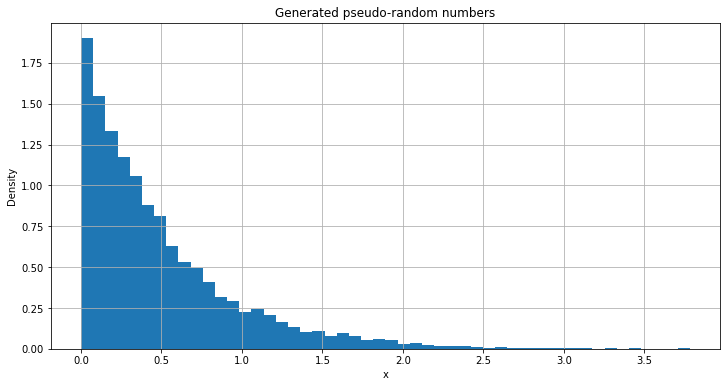

In [6]:

def inverse_cdf(u):
    return -np.log(u) / 2

n = 5000  # number of samples
u = np.random.uniform(0, 1, n)
x = inverse_cdf(u)

plt.figure(figsize = (12,6))
plt.hist(x, bins=50, density=True)
plt.title('Generated pseudo-random numbers')
plt.ylabel('Density')
plt.xlabel('x')
plt.grid()
plt.show()

Accept Reject Method

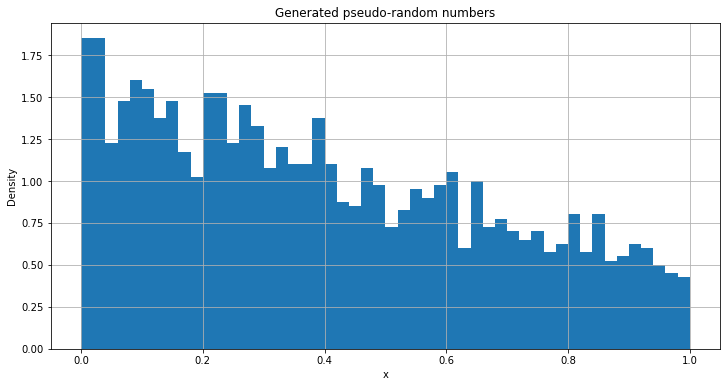

In [13]:
def sampling_dist(x):
    return 2-x

def target_dist(x):
    return math.exp(-2*x)

def accept_reject(n):
    samples = []
    M = 4  # Majorizing constant
    while len(samples) < n:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= target_dist(x) / (M * sampling_dist(x)):
            samples.append(x)
    return samples

samples = accept_reject(2000)

plt.figure(figsize = (12,6))
plt.hist(samples, bins=50, density=True)
plt.ylabel('Density')
plt.grid()
plt.xlabel('x')
plt.title('Generated pseudo-random numbers')
plt.show()


Ques 4:

In [11]:
def P_actual(f,N,b,a,X):
    sum=0
    for i in range(N):
        sum=sum+(b-a)*f(X[i])
    return sum/N

def P1(f,N,b,a,X):
    sum=0
    for i in range(N):
        sum=sum+f(X[i])/0.5
    return sum/N

def P2(f,N,b,a,X):
    sum=0
    for i in range(N):
        sum=sum+f(X[i])/math.exp(-1*X[i])
    return sum/N

def P3(f,N,b,a,X):
    sum=0
    for i in range(N):
        sum=sum+f(X[i])/math.exp(-1*X[i]/2)/(2*(1-math.exp(-0.5)))
    return sum/N

def f(x):
    return math.exp(-2*x)/(1+x**2)

In [12]:
b, a = 2,0 #Integration Bounds as given 
N = 10000
y_plot = []

y1 = lb.MonteCarlo(P1,f,N,b,a)
y2 = lb.MonteCarlo(P2,f,N,b,a)
y3 = lb.MonteCarlo(P3,f,N,b,a)
y_actual = lb.MonteCarlo(P_actual,f,N,b,a)
print("Actual integral value using uniform pdf:", y_actual)
print("with p1(x) = 0.5, integral value:", y1)
print("with p2(x) = exp(-x), integral value:", y2)
print("with p3(x) = exp(-x/2)/[2(1-exp(-0.5))], integral value:", y3)
print("To minimize variance, we use an importance sampling function, p1(x)=0.5, which is constant across the interval [0, 2]. This ensures equal sampling weight for all parts, preventing undersampling. If the function being integrated is significant throughout, this uniform sampling captures all contributions effectively.")

Actual integral value using uniform pdf: 0.40104593976478975
with p1(x) = 0.5, integral value: 0.39863455543615084
with p2(x) = exp(-x), integral value: 0.3010984658414918
with p3(x) = exp(-x/2)/[2(1-exp(-0.5))], integral value: 0.3058768123626238
To minimize variance, we use an importance sampling function, p1(x)=0.5, which is constant across the interval [0, 2]. This ensures equal sampling weight for all parts, preventing undersampling. If the function being integrated is significant throughout, this uniform sampling captures all contributions effectively.
